In [1]:
# pvcobra is a paid software thus not considered
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
from vad.energy_vad import EnergyVAD

In [2]:

waveform, sample_rate = torchaudio.load('example.wav')

vad = EnergyVAD()
vad_output = vad(waveform)

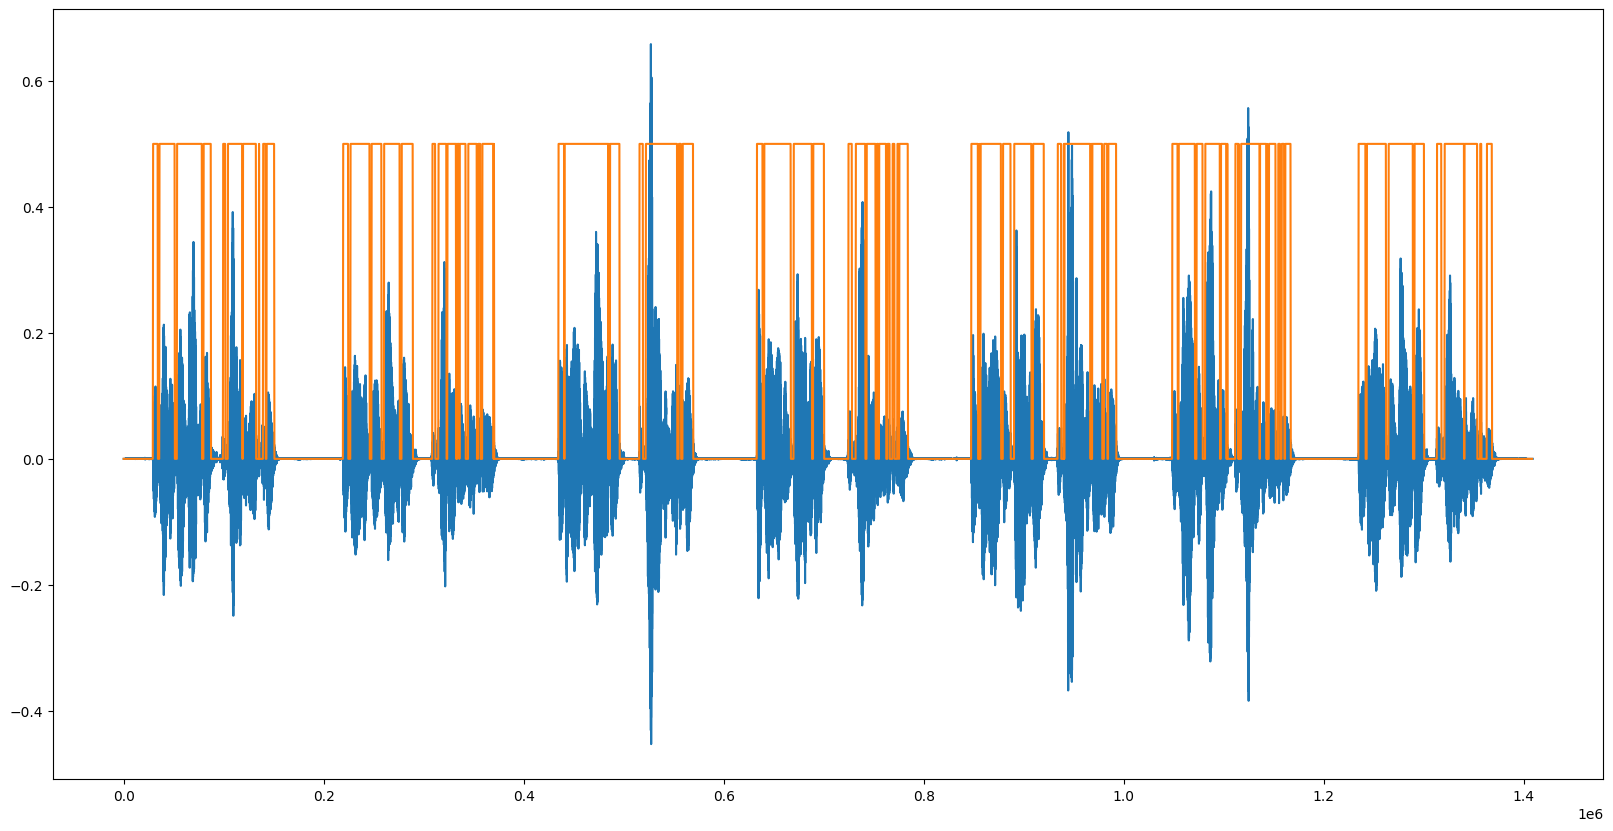

In [3]:

plt.figure(figsize=(20, 10))
plt.plot(waveform.numpy()[0, :])
# each frame is 20ms
plt.plot(np.arange(0, waveform.shape[1], 320)[: len(vad_output)], vad_output * 0.5)
plt.savefig("vad_output.png")

In [4]:
import torch
# re-stich the audio to remove the silence
# this is just an example, you can do whatever you want with the VAD output
new_waveform = []
for i in range(len(vad_output)):
    if vad_output[i] == 1:
        new_waveform.append(waveform.numpy()[0, i * 320 : (i + 1) * 320])
new_waveform = np.concatenate(new_waveform)
# convert to tensor
new_waveform = torch.from_numpy(new_waveform)
new_waveform = new_waveform.unsqueeze(0)

In [5]:
# save the new audio
torchaudio.save("example_vad.wav", new_waveform, sample_rate)

# test apply_vad
new_waveform = vad.apply_vad(waveform.numpy())
print ("New waveform shape: ", new_waveform.shape)
new_waveform = torch.from_numpy(new_waveform)
torchaudio.save("example_vad_2.wav", new_waveform, sample_rate)

New waveform shape:  (2, 730240)


In [6]:
# testing audio from radio
import requests
audio_url       = "https://storage.googleapis.com/radiofilez/english/sunday/cp_91_3-2022-11-27_T06.00.01.mp3"
audio_file_path = "downloaded_audio.mp3"
def download_audio(url:str,dest_path:str, verbose:bool=False):
    response = requests.get(url, allow_redirects=True)
    if response.status_code == 200:
        with open(dest_path, 'wb') as f: f.write(response.content)
        if verbose:print("Audio downloaded SuccessFuly")
        return True
    if verbose:print("Audio has not downloaded")
    return False
# download_audio(
#     url=audio_url,
#     dest_path=audio_file_path,
#     verbose=True
# )

In [7]:
waveform, sample_rate = torchaudio.load(audio_file_path)

vad = EnergyVAD()
vad_output = vad(waveform)

In [8]:

# plt.figure(figsize=(20, 10))
# plt.plot(waveform.numpy()[0, :])
# # each frame is 20ms
# plt.plot(np.arange(0, waveform.shape[1], 320)[: len(vad_output)], vad_output * 0.5)

In [9]:
import torch
# re-stich the audio to remove the silence
# this is just an example, you can do whatever you want with the VAD output
new_waveform = []
for i in range(len(vad_output)):
    if vad_output[i] == 1:
        new_waveform.append(waveform.numpy()[0, i * 320 : (i + 1) * 320])
new_waveform = np.concatenate(new_waveform)
# convert to tensor
new_waveform = torch.from_numpy(new_waveform)
new_waveform = new_waveform.unsqueeze(0)

# save the new audio
torchaudio.save(f"{audio_file_path}_vad.wav", new_waveform, sample_rate)